## Import and setup

In [4]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import PIL
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
with open('results\\final_pipeline.pickle', 'rb') as file:
    pipeline = pickle.load(file)
data = pd.read_csv('results\\cleaned.csv')

In [6]:
data.fillna(value = '', inplace=True)

## analisi separata

In [4]:
for piattaforma in data['piattaforma'].unique():
  print("-------", piattaforma, "-------")
  temp = data[data['piattaforma'] == piattaforma]
  try:
    pipeline.fit(temp['commento_p'], temp['target'])
  except:
    print("too small size")
    continue
  index_positive = np.argsort(-1*pipeline[1].coef_)[0][: 10]
  print("\t Positive")
  for i in index_positive:
    print(pipeline[0].get_feature_names()[i])
  index_negative = np.argsort(pipeline[1].coef_)[0][: 10]
  print("\t Negative")
  for i in index_negative:
    print(pipeline[0].get_feature_names()[i])

------- bandi online -------
	 Positive
facile
ottimo
veloce
chiaro
ben
bene
ottima
buona
chiara
gestione
	 Negative
non
troppo
poco
complessa
complicato
difficile
tempistiche
lunghi
tempi
fase
------- siage -------
	 Positive
chiaro
semplice
facile
ottima
funzionale
gestione
buono
aiuto
non non_problemi
abbastanza
	 Negative
troppo
non
complicato
complicata
poco
burocrazia
rendicontazione
cioè
essere
sufficientemente intuitivo
------- pec-peo -------
	 Positive
chiaro
semplice
abbastanza
facile
comprensibile
disponibili
buono
persone
chiarezza
stati
	 Negative
non
informazione
documenti
regolamento chiaro
regolamento
complesso
troppo
lunghi
bando
richiede
------- sintesi -------
	 Positive
gestione
non_bandi
non_avvezzo non_usare
fruibile
fruibile non
gestione sito
non_avvezzo
sito fruibile
non non_avvezzo
non_piattaforme
	 Negative
validazione liquidazione
liquidazione
liquidazione ecc
lunghe
lunghe validazione
poco
poco chiaro
presentazione
ecc
presentazione bando
------- sisco ----

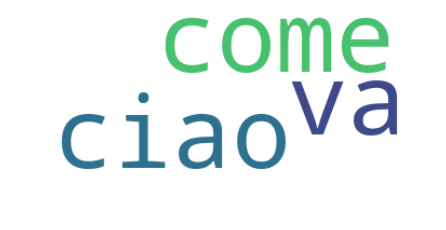

In [27]:
wordcloud = WordCloud(background_color='white').generate("ciao come va")
plt.axis("off")
#plt.figure( figsize = (15, 10))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = 'bilinear')

915460736162355, 1.0818213541831376, ''),
  Text(-0.20420240722014377, 1.080879908632545, ''),
  Text(-0.20924575738954798, 1.0799149100806391, ''),
  Text(-0.21428454797230478, 1.078926379555299, ''),
  Text(-0.21931866917023982, 1.0779143385971797, ''),
  Text(-0.22183394446572582, 1.0773995085773789, ''),
  Text(-0.2243480112869263, 1.0768788092592412, ''),
  Text(-0.22937246473007747, 1.07581981410627, ''),
  Text(-0.23439192001393255, 1.074737376214386, ''),
  Text(-0.2394062677616446, 1.0736315191705392, ''),
  Text(-0.24441539870766182, 1.0725022670719977, ''),
  Text(-0.24691797376556898, 1.0719288755470233, ''),
  Text(-0.24941920370011056, 1.0713496445258208, ''),
  Text(-0.25191907488545484, 1.0707645771638399, ''),
  Text(-0.2544175737031718, 1.0701736766483239, ''),
  Text(-0.2569146865423079, 1.0695769461982938, ''),
  Text(-0.2594103997994592, 1.06897438906453, ''),
  Text(-0.26439757319239005, 1.0677518079076125, ''),
  Text(-0.26937898520855874, 1.0665059598183253, '')

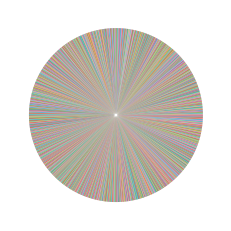

In [8]:
import matplotlib.pyplot as plt
plt.pie(data['target'])